# Convolutional Neural Networks 

You’ll learn how to implement Convolutional Neural Networks (CNNs) in Python with Keras, and how to overcome overfitting with dropout.

You might have already heard of image or facial recognition or self-driving cars. These are real-life implementations of Convolutional Neural Networks (CNNs). Here, you will learn how to implement these deep, feed-forward artificial neural networks in Keras and also learn how to overcome overfitting with the regularization technique called "dropout".

More specifically, you'll tackle the following topics here:

1. You will be introduced to Convolutional Neural Networks. 

2. Then, you'll first try to understand the data. You'll use Python and its libraries to load, explore and analyze your data.

3. After that, you'll preprocess your data: you'll learn how to resize, rescale, convert your labels into one-hot encoding       vectors and split up your data in training and validation sets;

4. With all of this done, you can construct the neural network model: you'll learn how to model the data and form henetwork.
   Next, you'll compile, train and evaluate the model, visualizing the accuracy and loss plots;
   
5. Then, you will learn about the concept of overfitting and how you can overcome it by adding a dropout layer; With this
   information, you can revisit your original model and re-train the model. You'll also re-evaluate your new model and compare
   the results of both the models;

6. Next, you'll make predictions on the test data, convert the probabilities into class labels and plot few test samples
   that your model correctly classified and incorrectly classified;
      
7. Finally, you will visualize the classification report which will give you more in-depth intuition about which class was        (in)correctly classified by your model.

## Convolutional Neural Networks 

By now, you might already know about machine learning and deep learning, a computer science branch that studies the design of algorithms that can learn. Deep learning is a subfield of machine learning that is inspired by artificial neural networks, which in turn are inspired by biological neural networks.

A specific kind of such a deep neural network is the convolutional network, which is commonly referred to as CNN or ConvNet. It's a deep, feed-forward artificial neural network. Remember that feed-forward neural networks are also called multi-layer perceptrons(MLPs), which are the quintessential deep learning models. The models are called "feed-forward" because information flows right through the model. There are no feedback connections in which outputs of the model are fed back into itself.

CNNs specifically are inspired by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field. This idea was expanded by a captivating experiment done by Hubel and Wiesel in 1962 (if you want to know more, here's a video). In this experiment, the researchers showed that some individual neurons in the brain activated or fired only in the presence of edges of a particular orientation like vertical or horizontal edges. For example, some neurons fired when exposed to vertical sides and some when shown a horizontal edge. Hubel and Wiesel found that all of these neurons were well ordered in a columnar fashion and that together they were able to produce visual perception. This idea of specialized components inside of a system having specific tasks is one that machines use as well and one that you can also find back in CNNs.

Convolutional neural networks have been one of the most influential innovations in the field of computer vision. They have performed a lot better than traditional computer vision and have produced state-of-the-art results. These neural networks have proven to be successful in many different real-life case studies and applications, like:

    * Image classification, object detection, segmentation, face recognition;
    * Self driving cars that leverage CNN based vision systems;
    * Classification of crystal structure using a convolutional neural network;
    * And many more, of course!
    
To understand this success, you'll have to go back to 2012, the year in which Alex Krizhevsky used convolutional neural networks to win that year's ImageNet Competition, reducing the classification error from 26% to 15%.

Note that ImageNet Large Scale Visual Recognition Challenge (ILSVRC) began in the year 2010 is an annual competition where research teams assess their algorithms on the given data set and compete to achieve higher accuracy on several visual recognition tasks.

This was the time when neural networks [regained](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)  prominence after quite some time. This is often called the "third wave of neural networks". The other two waves were in the 1940s until the 1960s and in the 1970s to 1980s.

Alright, you know that you'll be working with feed-forward networks that are inspired by the biological visual cortex, but what does that actually mean?

Take a look at the picture below:

In [76]:
import warnings
warnings.filterwarnings('ignore')

The image shows you that you feed an image as an input to the network, which goes through multiple convolutions, subsampling, a fully connected layer and finally outputs something.

But what are all these concepts?

1. The convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. Each computation leads to extraction of a feature map from the input image. In other words, imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window or kernel around the image. At each position of that matrix, you multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. As a result, you'll get a single number that represents all the values in that window of the images. You use this layer to filtering: as the window moves over the image, you check for patterns in that section of the image. This works because of filters, which are multiplied by the values outputted by the convolution.

2. The objective of subsampling is to get an input representation by reducing its dimensions, which helps in reducing overfitting. One of the techniques of subsampling is max pooling. With this technique, you select the highest pixel value from a region depending on its size. In other words, max pooling takes the largest value from the window of the image currently covered by the kernel. For example, you can have a max-pooling layer of size 2 x 2 will select the maximum pixel intensity value from 2 x 2 region. You're right to think that the pooling layer then works a lot like the convolution layer! You also take a kernel or a window and move it over the image; The only difference is the function that is applied to the kernel and the image window isn't linear.

3. The objective of the fully connected layer is to flatten the high-level features that are learned by convolutional layers and combining all the features. It passes the flattened output to the output layer where you use a softmax classifier or a sigmoid to predict the input class label.

## The Fashion MNIST Data Set 

Before you go ahead and load in the data, it's good to take a look at what you'll exactly be working with! The Fashion-MNIST dataset is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images. You can double check this later when you have loaded in your data! ;)

Fashion-MNIST is similar to the MNIST dataset that you might already know, which you use to classify handwritten digits. That means that the image dimensions, training and test splits are similar to the MNIST dataset. Tip: if you want to learn how to implement an Multi-Layer Perceptron (MLP) for classification tasks with this latter dataset, go to this tutorial.

You can find the Fashion-MNIST dataset here, but you can also load it with the help of specific TensorFlow and Keras modules. You'll see how this works in the next section!

## Load the Data 

Keras comes with a library called datasets, which you can use to load datasets out of the box: you download the data from the server and speeds up the process since you no longer have to download the data to your computer. The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y, respectively.

In [6]:
#!pip install tensorflow

^C


In [77]:
import tensorflow as tf 
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
#from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = tf.keras.datasets.fashion_mnist.load_data()


Great! That was pretty simple, wasn't it?

You have probably done this a million times by now, but it's always an essential step to get started. Now you're completely set to start analyzing, processing and modeling your data!

## Analyze the Data  

Let's now analyze how images in the dataset look like. Even though you know the dimension of the images by now, it's still worth the effort to analyze it programmatically: you might have to rescale the image pixels and resize the images.

In [79]:
from tensorflow.keras.utils import to_categorical


print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, you can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

In [80]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


There's also a total of ten output classes that range from 0 to 9.

Also, don't forget to take a look at what the images in your dataset:

Text(0.5, 1.0, 'Ground Truth : 9')

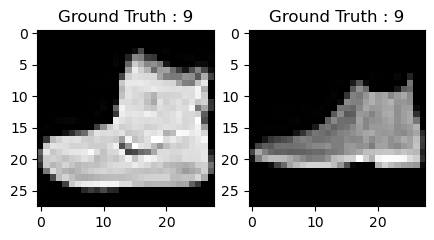

In [81]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

In [107]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

## Data Preprocessing 

As you could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28. As a result, you'll need to preprocess the data before you feed it into the model. 

1. As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [83]:
train1_X = train_X
train1_Y = train_Y
test1_X  = test_X
test1_Y  = test_Y

In [84]:
train1_X = train1_X/255
test1_X = test1_X/255

In [85]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

2. The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive. So let's do that!

In [86]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

3. Now you need to convert the class labels into a one-hot encoding vector.

In one-hot encoding, you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For your problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, the ankle boot image that you plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 1 0].

So let's convert the training and testing labels into one-hot encoding vectors:

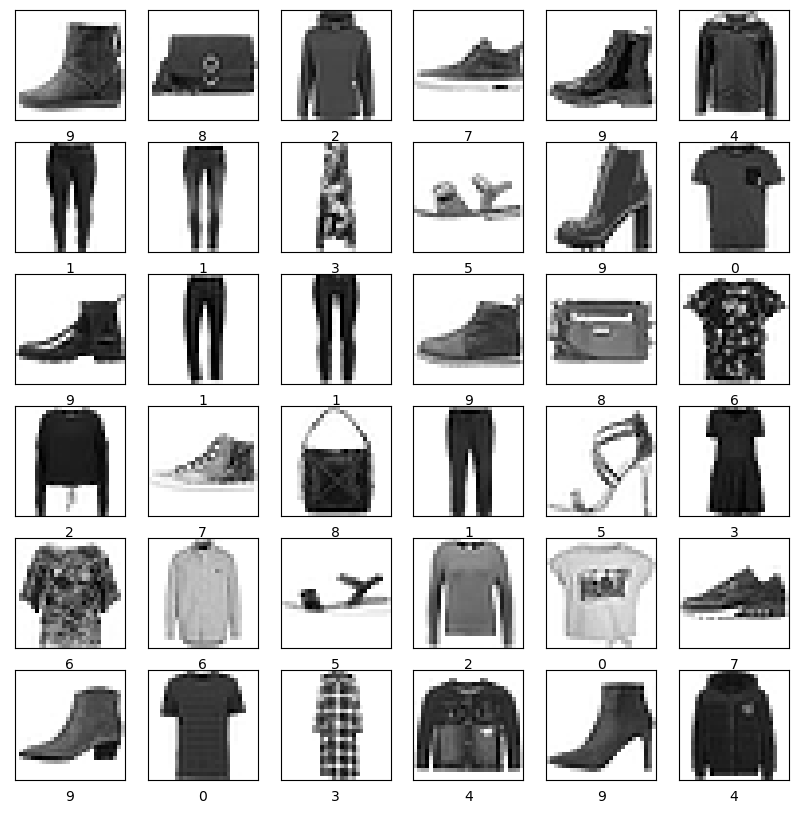

In [87]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_X[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_Y[image_ind])
     


In [88]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the category label using one-hot encoding
print('Original label:', train_Y[1])
print('After conversion to one-hot:', train_Y_one_hot[1])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


That's pretty clear, right? Note that you can also print the train_Y_one_hot, which will display a matrix of size 60000 x 10 in which each row depicts one-hot encoding of an image.

4. This last step is a crucial one. In machine learning or any data specific task, you should partition the data correctly. For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. In this case, you will train the model on 80\% of the training data and validate it on 20\% of the remaining training data. This will also help to reduce overfitting since you will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [89]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

For one last time let's check the shape of training and validation set.

In [90]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## The Network 

The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:

1. The first layer will have 32-3 x 3 filters,
2. The second layer will have 64-3 x 3 filters and
3. The third layer will have 128-3 x 3 filters.
4. In addition, there are three max-pooling layers each of size 2 x 2.

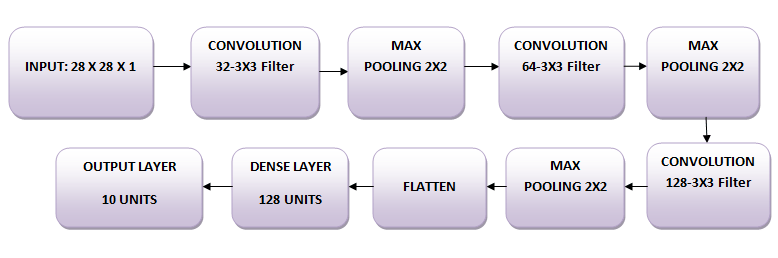

In [13]:
from IPython.display import Image
Image(filename='Model_Architecture.png')

## Model the Data  

First, let's import all the necessary modules required to train the model.

In [91]:
import keras
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model


We will use a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. We will train the network for 20 epochs.

In [92]:
batch_size = 64
epochs = 5
num_classes = 10

# BUILD ANN

In [93]:
model_A = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [94]:
model_A.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model_A.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [96]:
model_A.fit(train1_X,train1_Y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5430 - accuracy: 0.8138
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4168 - accuracy: 0.8533
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3855 - accuracy: 0.8630
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3645 - accuracy: 0.8701
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3482 - accuracy: 0.8766


# Test and Evaluate Neural Network Model

In [98]:
model_A.evaluate(test1_X,test1_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8576


[0.4051118791103363, 0.8575999736785889]

In [99]:
y_pred = model_A.predict(test1_X)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.5352516e-05, 3.1951998e-08, 1.7540038e-06, ..., 9.1400936e-02,
        4.5665822e-04, 8.1965369e-01],
       [2.5959453e-04, 3.0352118e-07, 9.8423541e-01, ..., 1.9930614e-16,
        4.2140993e-05, 2.9455946e-19],
       [2.2239858e-06, 9.9999237e-01, 1.3260827e-06, ..., 1.5781301e-13,
        9.3563264e-09, 2.3975319e-10],
       ...,
       [1.8692950e-02, 2.7114381e-06, 9.1909737e-05, ..., 1.1232698e-08,
        9.8021585e-01, 9.9212585e-09],
       [2.1478970e-06, 9.9963975e-01, 5.8659925e-06, ..., 4.6409583e-13,
        4.9969037e-07, 4.0258971e-08],
       [1.3863288e-04, 5.8774208e-06, 1.1145331e-04, ..., 4.6746610e-03,
        6.8606269e-03, 2.6303058e-04]], dtype=float32)

In [113]:
y_pred = np.argmax(np.round(y_pred),axis=1)

# Classification report for ANN

In [114]:

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test1_Y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.55      0.87      0.67      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.82      0.68      0.74      1000
     Class 3       0.82      0.89      0.85      1000
     Class 4       0.84      0.67      0.75      1000
     Class 5       0.93      0.97      0.95      1000
     Class 6       0.75      0.54      0.63      1000
     Class 7       0.95      0.90      0.92      1000
     Class 8       0.95      0.96      0.95      1000
     Class 9       0.96      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [100]:
y_pred[4].round(2)

array([0.22, 0.  , 0.09, 0.03, 0.01, 0.  , 0.64, 0.  , 0.  , 0.  ],
      dtype=float32)

In [101]:
np.argmax(y_pred[6].round(2))

4

In [103]:
# Classes
#0 => T-shirt/top 
#1 => Trouser 
#2 => Pullover 
#3 => Dress 
#4 => Coat 
#5 => Sandal 
#6 => Shirt 
#7 => Sneaker 
#8 => Bag 
#9 => Ankle boot

In [105]:
test1_Y[6]

4

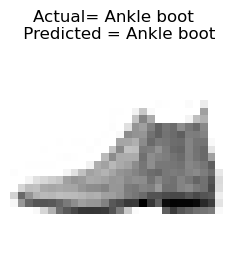

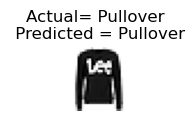

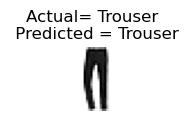

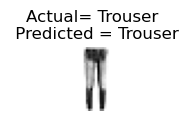

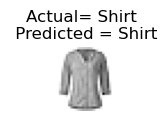

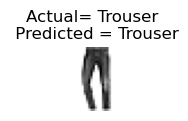

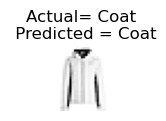

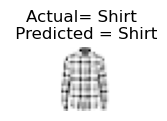

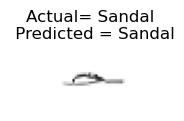

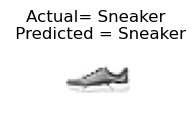

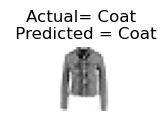

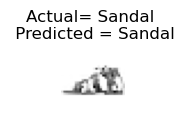

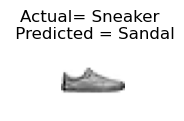

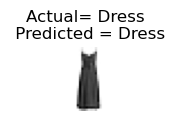

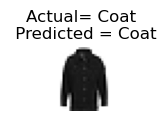

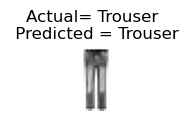

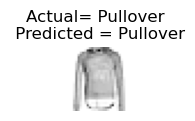

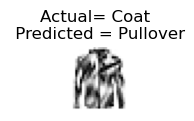

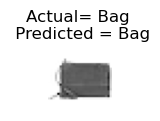

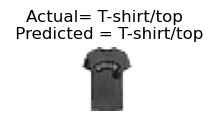

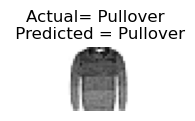

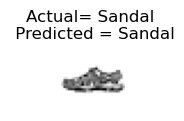

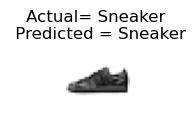

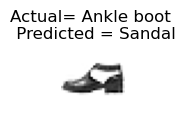

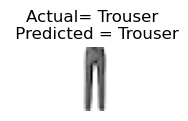

In [110]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(test1_X[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[test1_Y[i]], class_labels[np.argmax(y_pred[i])]))
  plt.show()

## Neural Network Architecture 

In Keras, you can just stack up layers by adding the desired layer one by one. That's exactly what you'll do here: you'll first add a first convolutional layer with Conv2D(). Note that you use this function because you're working with images! Next, you add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

More specifically, you add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

Next, you'll add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

In [18]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

## Compile the Model 

After the model is created, you compile it using the Adam optimizer, one of the most popular optimization algorithms. You can read more about this optimizer here. Additionally, you specify the loss type which is categorical cross entropy which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, you specify the metrics as accuracy which you want to analyze while the model is training.

In [19]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Let's visualize the layers that you created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

In [20]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [38]:
#!pip install pydot

In [39]:
#!pip install graphviz

In [53]:
#from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model
#import plot_model

ModuleNotFoundError: No module named 'plot_model'

In [18]:
import graphviz
graphviz.__version__

'0.20.1'

In [22]:
import matplotlib
matplotlib.use('TkAgg') 

In [25]:
plot_model(fashion_model, to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    dpi=300,
   show_layer_activations=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Train the Model 

It's finally time to train the model with Keras' fit() function! The model trains for 20 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

In [21]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/5
750/750 [==============================] - 98s 128ms/step - loss: 0.4655 - accuracy: 0.8313 - val_loss: 0.3477 - val_accuracy: 0.8732
Epoch 2/5
750/750 [==============================] - 96s 128ms/step - loss: 0.2879 - accuracy: 0.8940 - val_loss: 0.2789 - val_accuracy: 0.8964
Epoch 3/5
750/750 [==============================] - 95s 126ms/step - loss: 0.2404 - accuracy: 0.9113 - val_loss: 0.2466 - val_accuracy: 0.9103
Epoch 4/5
750/750 [==============================] - 94s 125ms/step - loss: 0.2047 - accuracy: 0.9233 - val_loss: 0.2573 - val_accuracy: 0.9089
Epoch 5/5
750/750 [==============================] - 97s 129ms/step - loss: 0.1795 - accuracy: 0.9332 - val_loss: 0.2336 - val_accuracy: 0.9174


Finally! We trained the model on fashion-MNIST for 20 epochs, and by observing the training accuracy and loss, we can say that the model did a good job since after 20 epochs the training accuracy is 99% and the training loss is quite low.

However, it looks like the model is overfitting, as the validation loss is 0.4077 and the validation accuracy is 92%. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

We probably need to handle this. In next sections, we'll learn how we can make your model perform much better by adding a Dropout layer into the network and keeping all the other layers unchanged.

But first, let's evaluate the performance of our model on the test set before we come on to a conclusion.

## Model Evaluation of the Test Data Set 

In [22]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [23]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2464687079191208
Test accuracy: 0.9129999876022339


The test accuracy looks impressive. It turns out that our classifier does better than the benchmark that was reported here, which is an SVM classifier with mean accuracy of 0.897. Also, the model does well compared to some of the deep learning models mentioned on the GitHub profile of the creators of fashion-MNIST dataset.

However, we saw that the model looked like it was overfitting. Are these results really all that good?

Let's put our model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

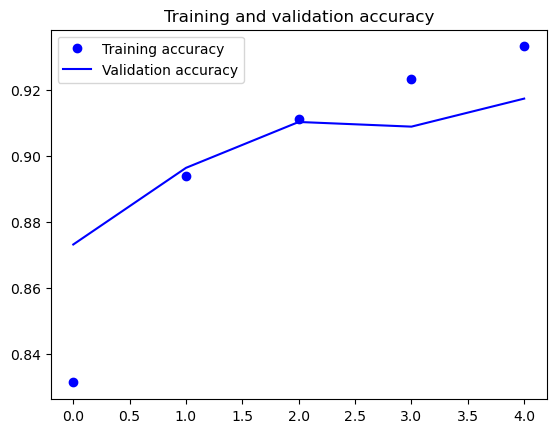

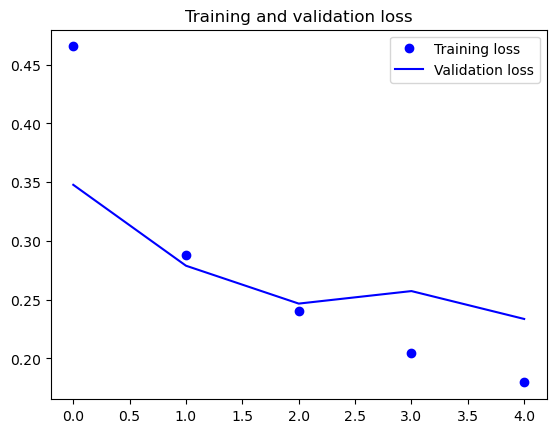

In [24]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

## Adding Dropout into the Network 

We can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

So let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.

In [26]:
batch_size = 64
epochs = 5
num_classes = 10

In [27]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [28]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [29]:
plot_model(fashion_model, to_file='model_2.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [31]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/5
750/750 [==============================] - 110s 144ms/step - loss: 0.6000 - accuracy: 0.7785 - val_loss: 0.3700 - val_accuracy: 0.8643
Epoch 2/5
750/750 [==============================] - 109s 146ms/step - loss: 0.3792 - accuracy: 0.8606 - val_loss: 0.3195 - val_accuracy: 0.8814
Epoch 3/5
750/750 [==============================] - 110s 146ms/step - loss: 0.3321 - accuracy: 0.8764 - val_loss: 0.2850 - val_accuracy: 0.8959
Epoch 4/5
750/750 [==============================] - 107s 143ms/step - loss: 0.3012 - accuracy: 0.8873 - val_loss: 0.2723 - val_accuracy: 0.8969
Epoch 5/5
750/750 [==============================] - 107s 143ms/step - loss: 0.2883 - accuracy: 0.8922 - val_loss: 0.2607 - val_accuracy: 0.9024


Let's save the model so that you can directly load it and not have to train it again for 20 epochs. This way, you can load the model later on if you need it and modify the architecture; Alternatively, you can start the training process on this saved model. It is always a good idea to save the model -and even the model's weights!- because it saves you time. Note that you can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, you will not have to start the training from the beginning.

In [32]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


## Model Evaluation on the Test Data Set 

Finally, let's also evaluate your new model and see how it performs!

In [33]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 6s 21ms/step - loss: 0.2666 - accuracy: 0.8985


In [34]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.266557902097702
Test accuracy: 0.8985000252723694


Wow! Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.

Now, let's plot the accuracy and loss plots between training and validation data for the one last time.

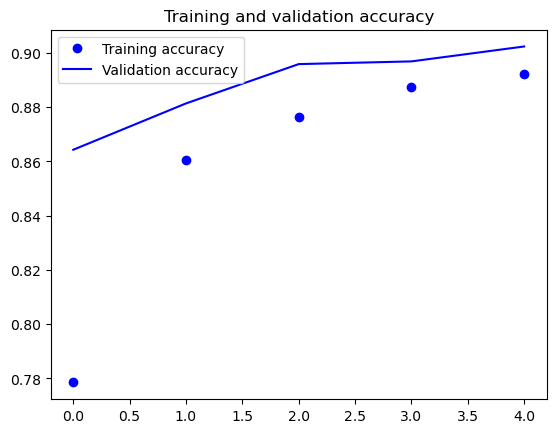

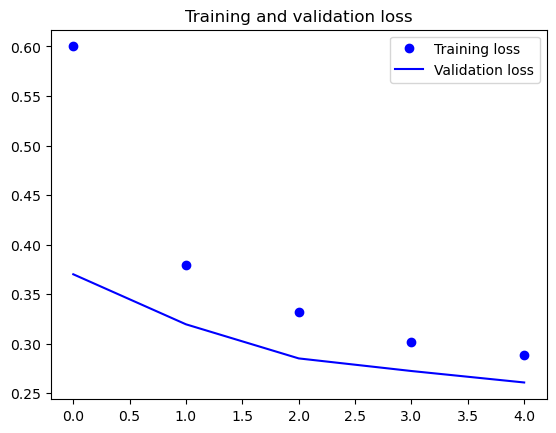

In [35]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

Therefore, you can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

## Predict Labels 

In [36]:
predicted_classes = fashion_model.predict(test_X)

313/313 [==============================] - 7s 20ms/step


Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use np.argmax() to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [37]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [38]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 8916 correct labels


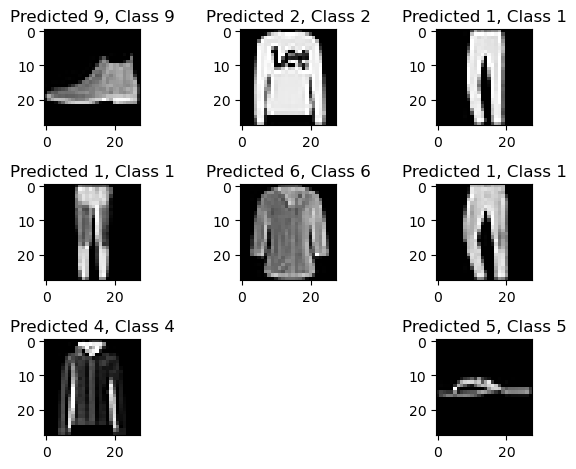

In [39]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 1084 incorrect labels


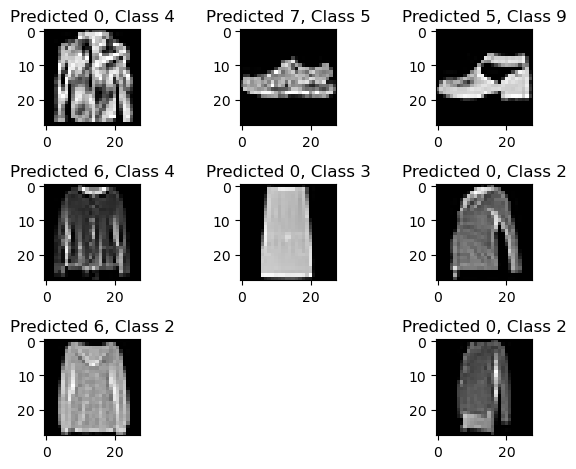

In [41]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

By looking at a few images, you cannot be sure as to why your model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture. For example, images 5 and 6 both belong to different classes but look kind of similar maybe a jacket or perhaps a long sleeve shirt.

## Classification Report 

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.

In [44]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.68      0.91      0.77      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.85      0.84      0.85      1000
     Class 3       0.91      0.91      0.91      1000
     Class 4       0.88      0.74      0.81      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.76      0.66      0.70      1000
     Class 7       0.93      0.99      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.99      0.94      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



You can see that the classifier is underperforming for class 6 regarding both precision and recall. For class 0 and class 2, the classifier is lacking precision. Also, for class 4, the classifier is slightly lacking both precision and recall.